* How many users have access to pin videos in the map
* How many historical videos have been pin in the map
* Historical number of videos created (people that records videos move to the preview screen & post or/and drop)
* Historical videos shared (published)
* Historical videos drafted

In [9]:
from flickplay.get_connections import get_pymysql_con, get_alchemy_con
from flickplay.mongo import get_mongo_db_obj
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
import seaborn as sns
from collections import Counter
import random
import datetime

conp, con = get_pymysql_con(), get_alchemy_con()
db = get_mongo_db_obj()


In [7]:
(datetime.datetime.now() - all_recordings.iloc[14800].created).days

NameError: name 'all_recordings' is not defined

* Historical number of videos created (people that records videos move to the preview screen & post or/and drop)
* Historical videos shared (published)
* Historical videos drafted

In [ ]:
dr = pd.DataFrame.from_records(db.recordings.find())

In [10]:
dr

,_id,video,thumbnail,hashtags,hashtagIds,mentions,text,published,likes,shares,...,locationName,locationId,smallIcon,smallThumbnail,mapThumbnail,musicId,musicTitle,musicArtist,scorePointsV2,disneyBoost
0,5e388c3acdf3ac49a817a014,{'name': 'video-good-16635817-D490-480C-A469-D...,"{'name': None, 'path': 'users/5df3dbf774384514...",[],[],[],So good🌼,True,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5e4b331a2f9e3e7effe8e37b,{'name': 'video-f-1966B96B-C1A5-4DC0-ADBD-D8EA...,"{'name': None, 'path': 'users/5df1201474236794...",[],[],[5df3dbf77438451456510db4],So good wall @mellissagao,True,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5e4d8b6c42b46e866aa3ac97,{'name': 'video-f-586703D0-2D22-47B7-AC36-25F9...,"{'name': None, 'path': 'users/5df1201474236794...",[],[],[5df1201474236794fbe087bb],Wing wall @pierinam,True,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5e729124951adf798a477c4c,"{'name': 'Composition-1584566443.330333.mp4', ...","{'name': 'Composition-1584566443.330333.mp4', ...",[],[],[],Cougar wall 💥,True,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e7297b8951adf4cf0477cc7,"{'name': 'Composition-1584568126.992243.mp4', ...","{'name': 'Composition-1584568126.992243.mp4', ...",[],[],[],Daisy Gray Digital Photobooth ‼️@bnjm20,True,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15132,63c97aa7d314df131eb7cdac,{'name': 'raw-v-06BA2834-C3A2-42F5-8A46-503657...,{'name': 'raw-v-06BA2834-C3A2-42F5-8A46-503657...,[],[],[],,True,1,0,...,NaN,None,users/629fd04337d60d14998feff0/videos/thumbnai...,users/629fd04337d60d14998feff0/videos/thumbnai...,None,62a7e040419c0c43727d85c7,Comical,FlickPlay Original Song,-1.0,False
15133,63c985b770f72bd8f941d935,{'name': 'raw-v-A0FEC8C1-133F-4748-8AB6-4C3C05...,{'name': 'raw-v-A0FEC8C1-133F-4748-8AB6-4C3C05...,[#FlickyDoingGood],[63c84a62254af964f22d695b],[],My flicky doesn’t have fuzzy jacket but he lov...,True,1,0,...,NaN,None,users/629fd04337d60d14998feff0/videos/thumbnai...,users/629fd04337d60d14998feff0/videos/thumbnai...,None,62a7e040419c0c43727d85c7,Comical,FlickPlay Original Song,-1.0,False
15134,63c9971c8b736b5726a962b8,{'name': 'raw-v-937E0381-68BE-4BC4-99FE-47B187...,{'name': 'raw-v-937E0381-68BE-4BC4-99FE-47B187...,[#sdgimpactworld],[63c57c3992e2dc14e497a87d],[],Doesn’t this pin look delicious?? #sdgimpactworld,True,0,0,...,NaN,None,users/63bf446eb02a560946a0671b/videos/thumbnai...,users/63bf446eb02a560946a0671b/videos/thumbnai...,None,None,None,None,-1.0,False
15135,63c9b58170f72b027a429369,{'name': 'raw-v-DEDC55D7-BCEB-443A-A368-41C9C9...,{'name': 'raw-v-DEDC55D7-BCEB-443A-A368-41C9C9...,"[#flicky, #dancing, #park, #tree]","[6266840a87577dc54fbb5e2b, 5fea52763f7925c88cf...",[],He is happy with that tree 🥹😂 #flicky #dancing...,True,0,0,...,NaN,None,users/62b22afdce3d26c33427135a/videos/thumbnai...,users/62b22afdce3d26c33427135a/videos/thumbnai...,None,627e97e918e4a4bfa42bab00,Aureate,FlickPlay Original Song,-1.0,False


In [51]:
users = pd.DataFrame.from_records(db.users.find())

In [67]:
u = pd.read_sql('''SELECT $user_id, anon_user from fpa.derived2 where $user_id is not null''', conp)


In [ ]:
derived = pd.read_sql("""SELECT * from fpa.derived2""", conp)

In [107]:
usets = {
    'uset':  set(u['$user_id']),
    'uaset': set(u[u.anon_user=='0']['$user_id']),
    'urset': set(u[u.anon_user=='1']['$user_id']),
    # 'ubset': set(u[u.anon_user=='0']['$user_id']).intersection(urset)
    }

ubset = set(u[u.anon_user=='0']['$user_id']).intersection(set(u[u.anon_user=='1']['$user_id']))
usets['ubset'] = ubset

for name, uset in usets.items():
    print(name,len(uset))

uset  = usets['uset']
uaset = usets['uaset']
urset = usets['urset']
ubset = usets['ubset']

uset 20378
uaset 5585
urset 18440
ubset 3647


In [110]:
us=u.copy()
a=uaset
r=urset
u=uset
b=ubset

,$user_id,anon_user
0,620c5085769989d8389db58e,0
1,620c5085769989d8389db58e,0
2,620c5085769989d8389db58e,0
3,620c5085769989d8389db58e,0
4,620c5085769989d8389db58e,0
...,...,...
12647152,62d5044122648df88a71ed06,0
12647153,62d5044122648df88a71ed06,0
12647154,62d5044122648df88a71ed06,0
12647155,62d5044122648df88a71ed06,0


In [74]:
len(usets['uset'])-len(usets['uaset'])+len(usets['ubset'])==len(usets['urset'])

True

In [ ]:
uset - 

In [80]:
(usets['uset']-usets['uaset']).union(usets['ubset'])==usets['urset']

True

In [ ]:
len(users[users.allowPinVideo==True])/len(

In [85]:
uids = [ str(x) for x in users._id ]


{'6220fc962aca7027e0903c17',
 '620d531d75e05c3a7f4c5702',
 '62c813557ff46a336c1de3c6',
 '62658b742a5b0a181815e67f',
 '638c48c78ffebe28e6c77926',
 '6285be8b8348f91379a8971d',
 '6241b664f8f58b82d9829002',
 '639062400d6cbec3ab48c8d1',
 '623a913da7f5eee7b5f83fe5',
 '622ced23dfdc06bc9b0bfa9e',
 '629dc316c537cbab9db86f4d',
 '636d837267353bf370fc41df',
 '629bc711ab6f151a4479b98e',
 '625cd76d55249c16cc78aa32',
 '63600d07d4c36c74ef85eccf',
 '6233b2579c14500d12f04233',
 '6248c6bad80b827257a97388',
 '62d94822619d52e25469fdd1',
 '62d811ac55432870fd2d1163',
 '620da86abeae60116013f292',
 '62fd4282f76d803c610cac35',
 '62a7ad9c2821f054412bd651',
 '62b478de899983e1ca0a0bbb',
 '63a3216b129b464c47014bd3',
 '621b71154c75386ea7554075',
 '6257c8fdb135c1dda40f0510',
 '622205c168928baef75ad7df',
 '6216b856b3fc53f583b0ab1b',
 '62a0b304a568a6be00af6242',
 '620d3c9789366df1de92704b',
 '62ae2add46378331451edd66',
 '62128bb84afddfbd8cad8051',
 '6243057539081361b5cc168a',
 '62aa40cd511ffebdf1cc3fb3',
 '622fbbf3477a

,days_ago,n_recent_recordings,n_recent_pins,pct_recent_pins
0,0,3,0,0.00
1,1,19,3,15.79
2,2,30,3,10.00
3,3,38,3,7.89
4,4,64,5,7.81
...,...,...,...,...
995,995,15051,1539,10.23
996,996,15051,1539,10.23
997,997,15051,1539,10.23
998,998,15051,1539,10.23


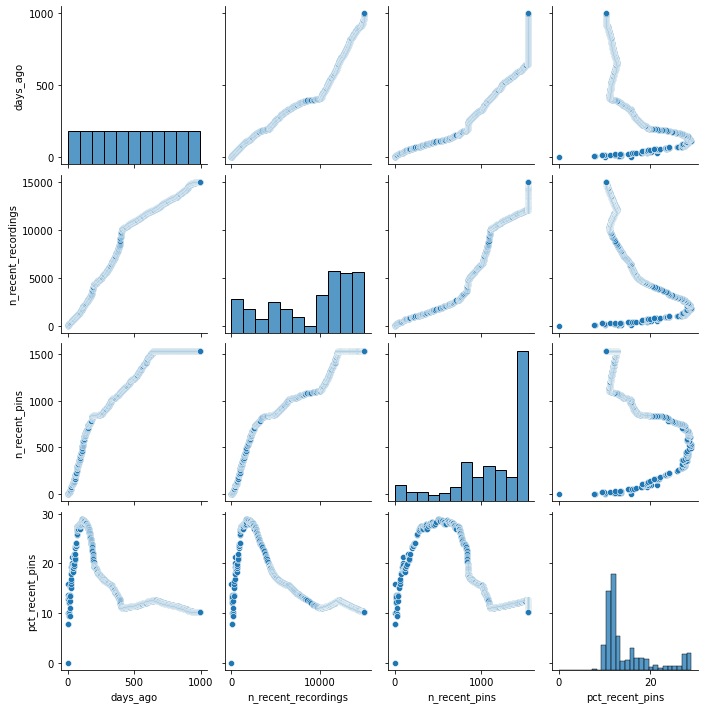

In [11]:
pinned_recordings = dr[~pd.isnull(dr['location'])]
all_recordings = dr


recording_pin_records = []

for days_lookback in range(0,1000):
    recent_recordings = all_recordings[all_recordings.created >= datetime.datetime.now()-datetime.timedelta(days=days_lookback)]
    recent_pins = recent_recordings[~pd.isnull(recent_recordings.location)]
    
    this_record = {
        'days_ago': days_lookback,
        'n_recent_recordings': len(recent_recordings),
        'n_recent_pins': len(recent_pins),
        'pct_recent_pins': round(len(recent_pins)/len(recent_recordings)*100,2)
    }
    
    recording_pin_records.append(this_record)
    
dd=pd.DataFrame.from_records(recording_pin_records)
       


def set_fig_size(width=18,height=10):
    fig,ax=plt.subplots(1,1)
    fig.set_size_inches(width,height)
    

def set_font_size(size=18):
    font = {'family' : 'verdana',
            'size'   : size}
    rc('font', **font)
    
def make_big(f=18,w=18,h=10):
    set_font_size(size=f)
    set_fig_size(width=w,height=h)
    
# set_fig_size(25,45)
sns.pairplot(dd)
# set_fig_size(45,25)
set_font_size(size=16)
plt.xticks(rotation=70)
# plt.set_size_inches(45,25)

dd

In [15]:
# bad = [] 

# q=dr[~pd.isnull(dr.experience)]
# q['l'] = [ len(x) for x in q.experiences ]
# qq=q[q.l==2]
# for idx, row in qq.iterrows():
#     print(row.experiences, row._id)
#     # bad.append(row._id)
#     print(row.experience, row._id)
#     bad.append(row._id)

In [14]:
# [ x for x in dr[dr._id.isin(bad)]._id.values]


In [16]:
# dr[dr._id.isin(['5fd6df8b8213697dd6c21500', '602c0c728792e3cfe2db178f'])]

Text(0.5, 1.0, 'trends since (days_ago)')

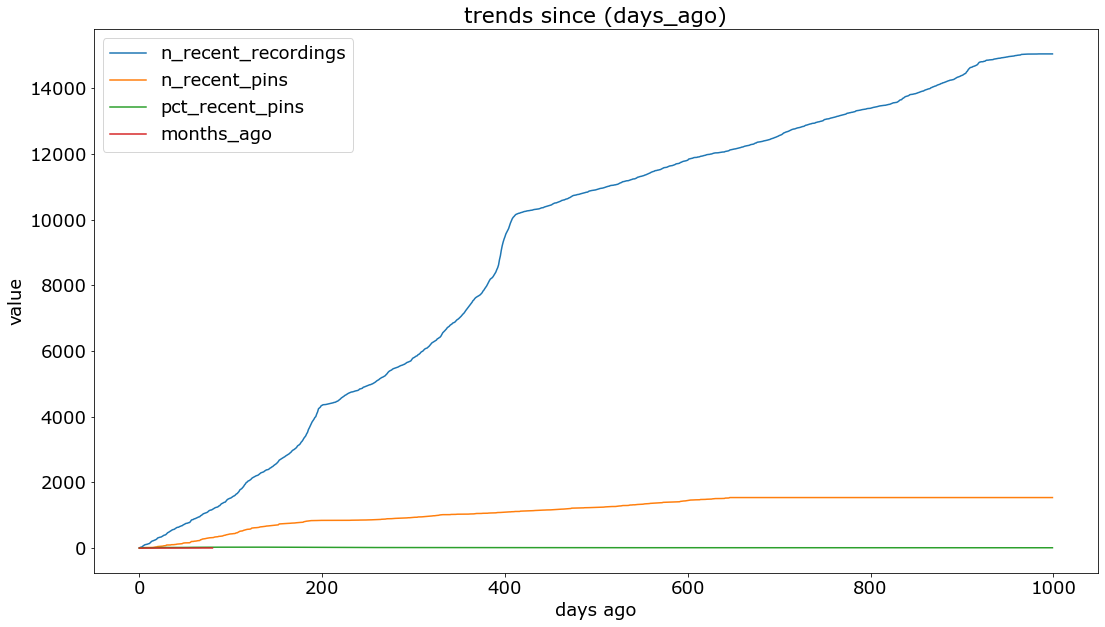

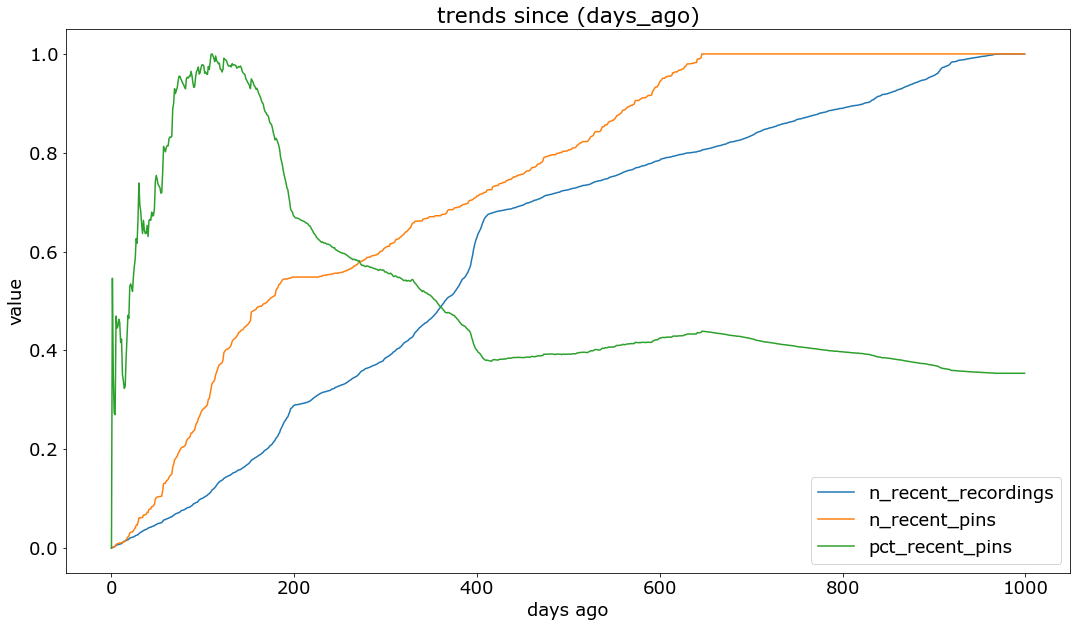

In [43]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc

s=275

def set_fig_size(width=18,height=10):
    fig,ax=plt.subplots(1,1)
    fig.set_size_inches(width,height)
    return fig,ax
    

def set_font_size(size=18):
    font = {'family' : 'verdana',
            'size'   : size}
    rc('font', **font)
    
def make_big(f=18,w=18,h=10):
    set_font_size(size=f)
    fig, ax = set_fig_size(width=w,height=h)
    return fig, ax

def get_minmax_scaled(data:pd.DataFrame):
    data = data.copy()
    scaler = MinMaxScaler()
    return scaler, pd.DataFrame(columns = data.columns,
                 data = scaler.fit_transform(data.to_numpy()))

def gmm(data):
    s,d = get_minmax_scaled(data)
    return d

dd=pd.DataFrame.from_records(recording_pin_records)
s,ddd=get_minmax_scaled(dd)
ddd

def months_ago_mapper(days_ago):
    e0,e1,e2,e3,e4 = tuple([31*i//2+3 for i in [1,2,3,4,5]])

    if days_ago<=e0:
        return 0
    
    elif days_ago<=e1:
        return 1
    
    elif days_ago<=e2:
        return 2
    
    elif days_ago<=e3:
        return 3
    
    elif days_ago<=e4:
        return 4
    
dd['months_ago'] = [ months_ago_mapper(days_ago) for days_ago in dd.days_ago ]
dd.index=dd.days_ago
fix,ax=make_big()
for colname in dd.drop(columns='days_ago').columns:
    # s,d=get_minmax_scaled(dd[colname])
    ax.plot(dd.index,dd[colname], label=colname)
plt.legend()
plt.xlabel('days ago')
plt.ylabel('value')
plt.title('trends since (days_ago)')

dd['months_ago'] = [ months_ago_mapper(days_ago) for days_ago in dd.days_ago ]
dd.index=dd.days_ago
fix,ax=make_big()
for colname in ddd.drop(columns='days_ago').columns:
    # s,d=get_minmax_scaled(dd[colname])
    ax.plot(dd.index,ddd[colname], label=colname)
plt.legend()
plt.xlabel('days ago')
plt.ylabel('value')
plt.title('trends since (days_ago)')

# sns.boxplot(y='n_recent_recordings', x=

1000

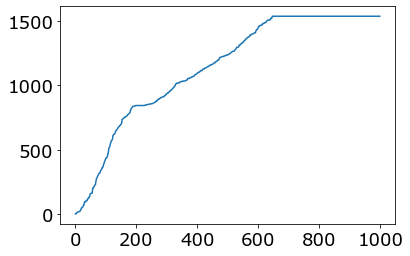

In [39]:
plt.plot(range(len(dd)), dd.n_recent_pins)

In [40]:
dd

,days_ago,n_recent_recordings,n_recent_pins,pct_recent_pins,months_ago
days_ago,,,,,
0,0,3,0,0.00,0.0
1,1,19,3,15.79,0.0
2,2,30,3,10.00,0.0
3,3,38,3,7.89,0.0
4,4,64,5,7.81,0.0
...,...,...,...,...,...
995,995,15051,1539,10.23,NaN
996,996,15051,1539,10.23,NaN
997,997,15051,1539,10.23,NaN


In [36]:
s,ddd=get_minmax_scaled(dd)
ddd

,days_ago,n_recent_recordings,n_recent_pins,pct_recent_pins,months_ago
0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.001001,0.001063,0.001949,0.545989,0.0
2,0.002002,0.001794,0.001949,0.345781,0.0
3,0.003003,0.002326,0.001949,0.272822,0.0
4,0.004004,0.004054,0.003249,0.270055,0.0
...,...,...,...,...,...
995,0.995996,1.000000,1.000000,0.353734,NaN
996,0.996997,1.000000,1.000000,0.353734,NaN
997,0.997998,1.000000,1.000000,0.353734,NaN
998,0.998999,1.000000,1.000000,0.353734,NaN


In [8]:
dd

NameError: name 'dd' is not defined

<AxesSubplot:xlabel='months_ago', ylabel='val'>

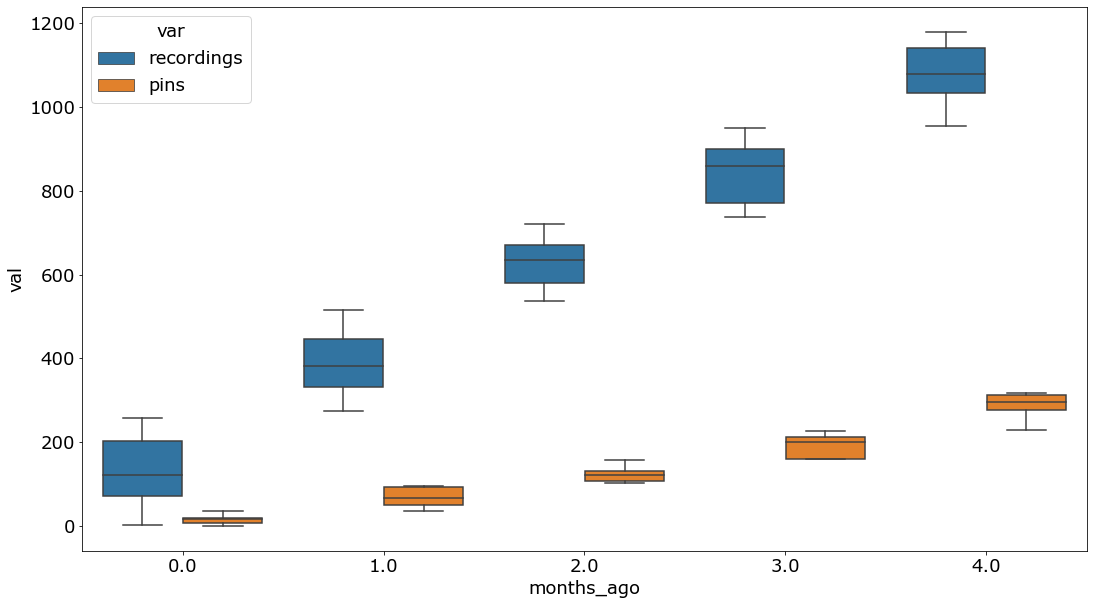

In [49]:
ddd = pd.DataFrame(columns=['days_ago','months_ago','val','var'], data=[])
ddd['days_ago'] = list(dd.days_ago)+list(dd.days_ago)
ddd['months_ago'] = [ months_ago_mapper(days_ago) for days_ago in ddd.days_ago ]
ddd['var'] = [ 'recordings' for i in range(len(dd)) ] + ['pins' for i in range(len(dd)) ]
ddd['val'] = [ dd.n_recent_recordings.iloc[idx] for idx in range(len(dd)) ] + [ dd.n_recent_pins.iloc[idx] for idx in range(len(dd)) ]
ddd=ddd[['var','val','days_ago','months_ago']]
ddd
make_big()
sns.boxplot(x='months_ago',y='val',hue='var', data=ddd)


In [ ]:
def months_ago_mapper(days_ago):
    e0,e1,e2,e3,e4 = tuple([31*i//2+3 for i in [1,2,3,4,5]])

    if days_ago<=e0:
        return 0
    
    elif days_ago<=e1:
        return 1
    
    elif days_ago<=e2:
        return 2
    
    elif days_ago<=e3:
        return 3
    
    elif days_ago<=e4:
        return 4
    
dd['momths_ago'] = [ months_ago_mapper(days_ago) for days_ago in dd.days_ago ]

In [ ]:
len(set(dr[~pd.isnull(dr.experience)].experience.value_counts().index))

In [ ]:
dr[['_id','created'.

In [20]:
users = pd.DataFrame.from_records(db.users.find())

In [27]:
users[users.allowPinVideo==True].columns

Index(['_id', 'profileImage', 'googleId', 'facebookId', 'appleId', 'email',
       'name', 'age', 'gender', 'bio', 'countryCode', 'phone', 'phoneHash',
       'role', 'isUser', 'isAdmin', 'loginCount', 'deleted', 'active',
       'verified', 'followingCount', 'followersCount', 'likesCount',
       'pointsCollected', 'flicksTotal', 'lastHomeFeedDate', 'pointsLastFlick',
       'lastNotificationDate', 'lang', 'presaleCode', 'isValidPresaleCode',
       'blockedUsers', 'username', 'salt', 'hashedPassword', 'created',
       'updated', 'lastUsed', 'profilePoints', 'pushToken', 'allTimePoints',
       'viewsCount', 'overrideViewsCount', 'device', 'ios', 'anonymous',
       'wasAnonymous', 'allowMap', 'allowVideoMap', 'allowPinVideo',
       'collectionsCount', 'collectionsSavedCount', 'tipsBalance', 'allTips',
       'cameraPermission', 'locationPermission', 'notificationPermission',
       'isMapCreator', 'allowAutopopulation', 'isCertified', 'pushTokens',
       'allTimeLikes', 'isMapCrea

Text(0.5, 1.0, 'y=allTimePoints,x=allowPinVideo,hue=verified')

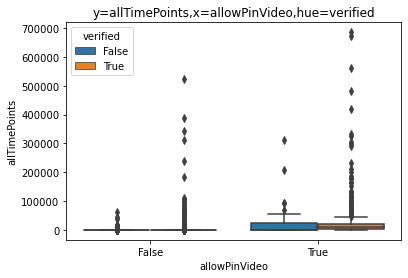

In [43]:
user_attributes = ['_id', 'profileImage', 'googleId', 'facebookId', 'appleId', 'email',
       'name', 'age', 'gender', 'bio', 'countryCode', 'phone', 'phoneHash',
       'role', 'isUser', 'isAdmin', 'loginCount', 'deleted', 'active',
       'verified', 'followingCount', 'followersCount', 'likesCount',
       'pointsCollected', 'flicksTotal', 'lastHomeFeedDate', 'pointsLastFlick',
       'lastNotificationDate', 'lang', 'presaleCode', 'isValidPresaleCode',
       'blockedUsers', 'username', 'salt', 'hashedPassword', 'created',
       'updated', 'lastUsed', 'profilePoints', 'pushToken', 'allTimePoints',
       'viewsCount', 'overrideViewsCount', 'device', 'ios', 'anonymous',
       'wasAnonymous', 'allowMap', 'allowVideoMap', 'allowPinVideo',
       'collectionsCount', 'collectionsSavedCount', 'tipsBalance', 'allTips',
       'cameraPermission', 'locationPermission', 'notificationPermission',
       'isMapCreator', 'allowAutopopulation', 'isCertified', 'pushTokens',
       'allTimeLikes', 'isMapCreatorDelete', 'pushCounterFollowing',
       'pushCounterWallet', 'spotCount', 'isBlocked', 'lastSyncDate',
       'createdThroughConnectWallet', 'isExperienceCreator', 'nftCreator',
       'flicks', 'yellowButtonCollected', 'walls', 'chameleonButton', 'sex',
       'flicksCollected', 'pushCounterLikes', 'avatar', 'profileCover',
       'keychainToken', 'lastSpotRecordingId', 'mapThumbnail', 'lastTipsDate',
       'deviceId', '__v', 'profileCoverV2', 'profileCoverVideoId',
       'profileCoverOffsetMultiplier', 'idfa', 'idfv']


yy='allTimePoints'
xx='allowPinVideo'
hue='verified'


sns.boxplot(y='allTimePoints',x='allowPinVideo',hue='verified',data=users[users.followersCount<=12000])
plt.title('y=allTimePoints,x=allowPinVideo,hue=verified')

In [ ]:
f(user, t) -> engagement

In [ ]:
f(
    X(user)

In [64]:
user_attrs = ['_id',
 'profileImage',
 'googleId',
 'facebookId',
 'appleId',
 'email',
 'name',
 'age',
 'gender',
 'bio',
 'countryCode',
 'phone',
 'phoneHash',
 'role',
 'isUser',
 'isAdmin',
 'loginCount',
 'deleted',
 'active',
 'verified',
 'followingCount',
 'followersCount',
 'likesCount',
 'pointsCollected',
 'flicksTotal',
 'lastHomeFeedDate',
 'pointsLastFlick',
 'lastNotificationDate',
 'lang',
 'presaleCode',
 'isValidPresaleCode',
 'blockedUsers',
 'username',
 'salt',
 'hashedPassword',
 'created',
 'updated',
 'lastUsed',
 'profilePoints',
 'pushToken',
 'allTimePoints',
 'viewsCount',
 'overrideViewsCount',
 'device',
 'ios',
 'anonymous',
 'wasAnonymous',
 'allowMap',
 'allowVideoMap',
 'allowPinVideo',
 'collectionsCount',
 'collectionsSavedCount',
 'tipsBalance',
 'allTips',
 'cameraPermission',
 'locationPermission',
 'notificationPermission',
 'isMapCreator',
 'allowAutopopulation',
 'isCertified',
 'pushTokens',
 'allTimeLikes',
 'isMapCreatorDelete',
 'pushCounterFollowing',
 'pushCounterWallet',
 'spotCount',
 'isBlocked',
 'lastSyncDate',
 'createdThroughConnectWallet',
 'isExperienceCreator',
 'nftCreator',
 'flicks',
 'yellowButtonCollected',
 'walls',
 'chameleonButton',
 'sex',
 'flicksCollected',
 'pushCounterLikes',
 'avatar',
 'profileCover',
 'keychainToken',
 'lastSpotRecordingId',
 'mapThumbnail',
 'lastTipsDate',
 'deviceId',
 '__v',
 'profileCoverV2',
 'profileCoverVideoId',
 'profileCoverOffsetMultiplier',
 'idfa',
 'idfv']

user_attr_keys = ['identification',
                  'permissivity',
                  'behavior', 
                  'engagement', 
                  'social_power', 
                  'ownership']

user_attributes = { k:[] for k in user_attr_keys }                  

identification = [
 '_id',
 'profileImage',
 'googleId',
 'facebookId',
 'appleId',
 'email',
 'name',
 'age',
 'gender',
 'bio',
 'countryCode',
 'phone',
 'phoneHash',
 'lang',
 'presaleCode',
 'isValidPresaleCode',
 'username',
 'salt',
 'hashedPassword',
 'device',
 'ios',
 'anonymous',
 'wasAnonymous',
 'avatar',
 'profileCover',
 'keychainToken',
 'deviceId',
 'profileCoverV2',
 'profileCoverVideoId',
 'profileCoverOffsetMultiplier',
 'idfa',
 'idfv']

permissivity = [
 'profileImage',
 'googleId',
 'facebookId',
 'appleId',
 'email',
 'name',
 'age',
 'gender',
 'bio',
 'phone',
 'wasAnonymous',
 'verified',
 'cameraPermission',
 'locationPermission',
 'notificationPermission',
 'allowAutopopulation',
 '<web3>']

behavior = [
 'loginCount',
 'active',
 'verified',
 'followingCount',
 'followersCount',
 'likesCount',
 'pointsCollected',
 'flicksTotal',
 'lastHomeFeedDate',
 'pointsLastFlick',
 'lastNotificationDate',
 'blockedUsers',
 'created',
 'updated',
 'lastUsed',
 'profilePoints',
 'pushToken',
 'allTimePoints',
 'viewsCount',
 'allowMap',
 'allowVideoMap',
 'allowPinVideo',
 'collectionsCount',
 'collectionsSavedCount',
 'tipsBalance',
 'allTips',
 'cameraPermission',
 'locationPermission',
 'notificationPermission',
 'isMapCreator',
 'allowAutopopulation',
 'isCertified',
 'pushTokens',
 'allTimeLikes',
 'isMapCreatorDelete',
 'pushCounterFollowing',
 'pushCounterWallet',
 'isBlocked',
 'lastSyncDate',
 'createdThroughConnectWallet',
 'isExperienceCreator',
 'nftCreator',
 'yellowButtonCollected',
 'flicksCollected',
 'pushCounterLikes',
 'lastSpotRecordingId',
 'mapThumbnail',
 'lastTipsDate']

engagement=[
 'loginCount',
 'deleted',
 'active',
 'followingCount',
 'followersCount',
 'likesCount',
 'pointsCollected',
 'flicksTotal',
 'lastHomeFeedDate',
 'pointsLastFlick',
 'lastNotificationDate',
 'created',
 'updated',
 'lastUsed',
 'profilePoints',
 'allTimePoints',
 'viewsCount',
 'allowMap',
 'allowVideoMap',
 'allowPinVideo',
 'collectionsCount',
 'collectionsSavedCount',
 'tipsBalance',
 'allTips',
 'cameraPermission',
 'locationPermission',
 'notificationPermission',
 'isMapCreator',
 'allowAutopopulation',
 'isCertified',
 'allTimeLikes',
 'isMapCreatorDelete',
 'lastSyncDate',
 'createdThroughConnectWallet',
 'isExperienceCreator',
 'nftCreator',
 'flicks',
 'yellowButtonCollected',
 'chameleonButton',
 'flicksCollected',
 'pushCounterLikes',
 'lastSpotRecordingId',
 'mapThumbnail',
 'lastTipsDate']

social_power=[
 'followingCount',
 'followersCount',
 'likesCount',
 'pointsCollected',
 'flicksTotal',
 'pointsLastFlick',
 'profilePoints',
 'allTimePoints',
 'viewsCount',
 'allowMap',
 'allowVideoMap',
 'allowPinVideo',
 'collectionsCount',
 'tipsBalance',
 'allTips',
 'isMapCreator',
 'allTimeLikes',
 'pushCounterFollowing',
 'spotCount',
 'isExperienceCreator',
 'nftCreator',
 'pushCounterLikes']

ownership=[
 'flicksTotal',
 'pushToken',
 'collectionsCount',
 'collectionsSavedCount',
 'tipsBalance',
 'allTips',
 'nftCreator',
 'flicks',
 'yellowButtonCollected',
 'flicksCollected']

user_attr_categories = { 
                        'behavior':       behavior,
                        'engagement':     engagement,
                        'identification': identification,
                        'ownership':      ownership,
                        'permissivity':   permissivity,
                        'social_power':   social_power
                       }


pprint(user_attr_categories)

{'behavior': ['loginCount',
              'active',
              'verified',
              'followingCount',
              'followersCount',
              'likesCount',
              'pointsCollected',
              'flicksTotal',
              'lastHomeFeedDate',
              'pointsLastFlick',
              'lastNotificationDate',
              'blockedUsers',
              'created',
              'updated',
              'lastUsed',
              'profilePoints',
              'pushToken',
              'allTimePoints',
              'viewsCount',
              'allowMap',
              'allowVideoMap',
              'allowPinVideo',
              'collectionsCount',
              'collectionsSavedCount',
              'tipsBalance',
              'allTips',
              'cameraPermission',
              'locationPermission',
              'notificationPermission',
              'isMapCreator',
              'allowAutopopulation',
              'isCertified',
              'push

users -> engagement
f(X(user)) = y
# User Profiling

y:
### Engagement Metrics
* screen time
* app features utilized
    - video watch
    - comment
    - video create

X(mongo):
### User Properties
* web3 or not
    - verified nft or not
* notifications enabled
* ownership
    - how many verified nfts, which ones ( experiences.certified: bool )
    - how many experiences
   
    
    
X(events)
### User Behviors
* video created
* how acquired
    - apple
    - regular
    - wallet connect

* map use / interaction
* what user did (events) \[before web3 (clustering?)\]
        1.  use of social feed
        2.  using camera
        3.  event: feature_session__start, prop: feature_session_type
        4.  create+publish video
        4.1 whether checked social graph event: collectible_value__social, prop: experience_id, experience_name, is_nft, ...
        5.  whether hit discover page -> event: feature_session__start, prop: feature_session_type OR event: 
        6.  engagement from others induced by created comment
            - likes
            - views
            - comments
            - followers
        7.  notificationEnabled, wallet connected, ... permissivity other
        8.  unlocked experiences [0,0,0,1,0,0,1,0,1,1,0 ...]  
            - free vs restricted (experiences.restricted: bool)
            - unlockedexperiences.type 
            - find out more 
        9.  whether bought / earned something (ownership of an experience)
            - purchased with tokens / event: ?
            - ~~gotten with blue coin~~
        10. chameleon game
            - event: homefeed__chamelion
        11. anonymous users (need tester compile flag?)
            - 
            - loss of collectible
        
        


# Model engagement with nft collection
nftcollection -> engagement
y = NFT engagement
X(NFTcollection)

# NFT collections
* 
* 
* 
* 
* 

# User Clustering
* cluster by event space



* set up debug mode for event generation


In [81]:

# users[users.isAdmin==1]

allows = users[users.allowPinVideo==1]
len(allows)/len(users)*100
len(allows)
print(len(users), len(allows), len(allows)/len(users*100))

import datetime


users.lastUsed.dtype

TypeError: cannot perform __mul__ with this index type: DatetimeArray

In [106]:
import datetime
from flickplay.mongo import get_mongo_db_obj
import pandas as pd

db = get_mongo_db_obj()
# All users
users = pd.DataFrame.from_records(db.users.find())
allows = users[users.allowPinVideo==True]

print('N_users_alltime:\t\t\t', len(users))
print('N_users_alltime_and_allowPinVideo:\t', len(allows))
print('pct_users_and_allowPinVideo:\t\t', len(allows)/len(users)*100)
print()
# recent users

DAYS_LOOKBACK=30
recent_users = users[users.lastUsed >= datetime.datetime.now()-datetime.timedelta(days=DAYS_LOOKBACK)]
recent_allows = recent_users[recent_users.allowPinVideo==True]

print('N_recent_users:\t\t\t\t',len(recent_users))
print('N_recent_users_and_allowPinVideo:\t',len(recent_allows))
print('pct_recent_user_and_allowPinVideo:\t',len(recent_allows)/len(recent_users)*100)

N_users_alltime:			 64384
N_users_alltime_and_allowPinVideo:	 477
pct_users_and_allowPinVideo:		 0.740867296222664
N_recent_users:				 1995
N_recent_users_and_allowPinVideo:	 116
pct_recent_user_and_allowPinVideo:	 5.814536340852131


In [41]:
print(users.columns)

Index(['_id', 'profileImage', 'googleId', 'facebookId', 'appleId', 'email',
       'name', 'age', 'gender', 'bio', 'countryCode', 'phone', 'phoneHash',
       'role', 'isUser', 'isAdmin', 'loginCount', 'deleted', 'active',
       'verified', 'followingCount', 'followersCount', 'likesCount',
       'pointsCollected', 'flicksTotal', 'lastHomeFeedDate', 'pointsLastFlick',
       'lastNotificationDate', 'lang', 'presaleCode', 'isValidPresaleCode',
       'blockedUsers', 'username', 'salt', 'hashedPassword', 'created',
       'updated', 'lastUsed', 'profilePoints', 'pushToken', 'allTimePoints',
       'viewsCount', 'overrideViewsCount', 'device', 'ios', 'anonymous',
       'wasAnonymous', 'allowMap', 'allowVideoMap', 'allowPinVideo',
       'collectionsCount', 'collectionsSavedCount', 'tipsBalance', 'allTips',
       'cameraPermission', 'locationPermission', 'notificationPermission',
       'isMapCreator', 'allowAutopopulation', 'isCertified', 'pushTokens',
       'allTimeLikes', 'isMapCrea

In [25]:
users[users.allowPinVideo==True][['_id','username']].to_csv('users_with_allowPinVideo.csv')

,_id,username
8,5ee9463955c2ec52d977680a,fernandafell
21,5f04c5bcfee73e31612e9f62,vivi
27,5eb83c832f927b8f72f5d0c2,andi
54,5e39a3832a7ba9457211e0c5,sujinlee
55,5ea84521af139b658a36c628,john
...,...,...
63396,63b03633d51c0ec865a46daf,anonymous-28483363
63523,63b41f3f61498c9912ab6105,deleted_1672749281165_pats
63657,63b817e55e0555a1e5706331,walletflicky_dhnerxj
64100,63c157325093f34cbbef510b,deleted_1673615626121_sagijo
